In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
data1_fake = pd.read_csv("D:/Datasets/gossipcop_fake.csv")
data1_real = pd.read_csv("D:/Datasets/gossipcop_real.csv")
data2_fake = pd.read_csv("D:/Datasets/politifact_fake.csv")
data2_real = pd.read_csv("D:/Datasets/politifact_real.csv")

In [3]:
data1_fake.head(3)

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...


In [4]:
data1_fake.columns

Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')

In [5]:
data1_fake.describe()

,id,news_url,title,tweet_ids
count,5323,5067,5323,5135
unique,5323,4681,4896,5047
top,gossipcop-2493749932,www.newidea.com.au/jennifer-aniston-and-brad-p...,Connecting People Through News,950201158445948928\t978452415514136576\t101565...
freq,1,8,20,6


In [6]:
data1_fake.shape

(5323, 4)

In [7]:
data1_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5323 non-null   object
 1   news_url   5067 non-null   object
 2   title      5323 non-null   object
 3   tweet_ids  5135 non-null   object
dtypes: object(4)
memory usage: 166.5+ KB


In [8]:
data1_fake.dtypes

id           object
news_url     object
title        object
tweet_ids    object
dtype: object

In [9]:
data1_real.head(3)

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...


In [10]:
data1_real.columns

Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')

In [11]:
data1_real.describe()

,id,news_url,title,tweet_ids
count,16817,16804,16817,15759
unique,16817,16010,15967,15758
top,gossipcop-882573,https://www.thewrap.com/this-is-us-everything-...,- USweekly,989840869443457024\t990987021194743808
freq,1,11,12,2


In [12]:
data1_real.shape

(16817, 4)

In [13]:
data1_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16817 entries, 0 to 16816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16817 non-null  object
 1   news_url   16804 non-null  object
 2   title      16817 non-null  object
 3   tweet_ids  15759 non-null  object
dtypes: object(4)
memory usage: 525.7+ KB


In [14]:
data2_fake.head(3)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...


In [15]:
data2_fake.columns

Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')

In [16]:
data2_fake.describe()

,id,news_url,title,tweet_ids
count,432,428,432,392
unique,432,428,428,392
top,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,Account Suspended,937349434668498944\t937379378006282240\t937380...
freq,1,1,3,1


In [17]:
data2_fake.shape

(432, 4)

In [18]:
data2_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         432 non-null    object
 1   news_url   428 non-null    object
 2   title      432 non-null    object
 3   tweet_ids  392 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


In [19]:
data2_real.head(3)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN


In [20]:
data2_real.columns

Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')

In [21]:
data2_real.describe()

,id,news_url,title,tweet_ids
count,624,567,624,409
unique,624,541,557,402
top,politifact14984,https://web.archive.org/web/20050322064340/htt...,"Outlook, Office, Skype, Bing, Breaking News, a...",1019328994607550465\t1019329029470674947\t1019...
freq,1,4,13,2


In [22]:
data2_real.shape

(624, 4)

In [23]:
data2_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         624 non-null    object
 1   news_url   567 non-null    object
 2   title      624 non-null    object
 3   tweet_ids  409 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [24]:
# check for null values in all datasets

data1_fake.isnull().sum()

id             0
news_url     256
title          0
tweet_ids    188
dtype: int64

In [25]:
data1_real.isnull().sum()

id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64

In [26]:
data2_fake.isnull().sum()

id            0
news_url      4
title         0
tweet_ids    40
dtype: int64

In [27]:
data2_real.isnull().sum()

id             0
news_url      57
title          0
tweet_ids    215
dtype: int64

In [28]:
# Add Labels (0 for fake, 1 for real)
data1_fake['label'] = 0
data1_real['label'] = 1
data2_fake['label'] = 0
data2_real['label'] = 1

In [29]:
# Combine All Datasets
df = pd.concat([data1_fake, data1_real, data2_fake, data2_real], ignore_index=True)

In [30]:
df.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0


In [31]:
# Drop unnecessary columns
df.drop(columns=["id", "news_url", "tweet_ids"], inplace=True)

In [32]:
# now again check nulls
print(df.isnull().sum())

title    0
label    0
dtype: int64


In [33]:
# Drop rows with missing titles
df.dropna(subset=["title"], inplace=True)

In [34]:
# Text Cleaning Function - removing url's, special characters, extra spaces
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text)  
    return text.strip()

df['clean_title'] = df['title'].apply(clean_text)

In [35]:
df['clean_title']

0        did miley cyrus and liam hemsworth secretly ge...
1        paris jackson cara delevingne enjoy night out ...
2        celebrities join tax march in protest of donal...
3        cindy crawfords daughter kaia gerber wears a w...
4                   full list of oscar nominations variety
                               ...                        
23191    flake religious tests should have no place in ...
23192                             change we can believe in
23193    deputy director of national health statistics ...
23194      romneys prolife conversion myth or reality june
23195                               interest group ratings
Name: clean_title, Length: 23196, dtype: object

In [36]:
df['clean_title'].count()

np.int64(23196)

In [37]:
!pip install scikit-learn

In [38]:
# Vectorize using TF-IDF - convert text data (words) into numerical vectors

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['clean_title'])
y = df['label']

In [39]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print(set(y_train))
print(set(y_test))

{0, 1}
{0, 1}


In [58]:
df['label'] = df['label'].map({'fake': 0, 'real': 1})

In [40]:
# train and model evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [46]:
print("Logistic Regression Results - ")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Results - 
Accuracy: 0.8288793103448275
Confusion Matrix:
 [[ 522  626]
 [ 168 3324]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.45      0.57      1148
           1       0.84      0.95      0.89      3492

    accuracy                           0.83      4640
   macro avg       0.80      0.70      0.73      4640
weighted avg       0.82      0.83      0.81      4640



In [47]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

In [48]:
print("Naive Bayes Results - ")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

Naive Bayes Results - 
Accuracy: 0.8202586206896552
Confusion Matrix:
 [[ 462  686]
 [ 148 3344]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.40      0.53      1148
           1       0.83      0.96      0.89      3492

    accuracy                           0.82      4640
   macro avg       0.79      0.68      0.71      4640
weighted avg       0.81      0.82      0.80      4640



In [50]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs= -1, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [51]:
print("Random Forest Results - ")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Results - 
Accuracy: 0.7887931034482759
Confusion Matrix:
 [[ 199  949]
 [  31 3461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.17      0.29      1148
           1       0.78      0.99      0.88      3492

    accuracy                           0.79      4640
   macro avg       0.83      0.58      0.58      4640
weighted avg       0.80      0.79      0.73      4640



In [53]:
# Support Vector machine - SVM

from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [54]:
print("SVM Results - ")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))

SVM Results - 
Accuracy: 0.8297413793103449
Confusion Matrix:
 [[ 565  583]
 [ 207 3285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.49      0.59      1148
           1       0.85      0.94      0.89      3492

    accuracy                           0.83      4640
   macro avg       0.79      0.72      0.74      4640
weighted avg       0.82      0.83      0.82      4640



In [76]:
# Now i just want to cross check and i'm evaluating all models and storing results

from sklearn.metrics import accuracy_score, classification_report
import gc

results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
results["Logistic Regression"] = {
    "accuracy": accuracy_score(y_test, lr_pred),
    "report": classification_report(y_test, lr_pred, output_dict=True)
}
del lr, lr_pred
gc.collect()

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
results["Naive Bayes"] = {
    "accuracy": accuracy_score(y_test, nb_pred),
    "report": classification_report(y_test, nb_pred, output_dict=True)
}
del nb, nb_pred
gc.collect()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results["Random Forest"] = {
    "accuracy": accuracy_score(y_test, rf_pred),
    "report": classification_report(y_test, rf_pred, output_dict=True)
}
del rf, rf_pred
gc.collect()

# SVM
svm = LinearSVC(max_iter=1000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
results["LinearSVM"] = {
    "accuracy": accuracy_score(y_test, svm_pred),
    "report": classification_report(y_test, svm_pred, output_dict=True)
}
del svm, svm_pred
gc.collect()


0

In [77]:
# Debug Checklist

# 1. Check label types
print("Train labels:", set(y_train))
print("Test labels:", set(y_test))

# 2. Check prediction values
print("Predicted values:", np.unique(lr_preds, return_counts=True))

# 3. Check actual accuracy
print("LogReg Accuracy:", results["Logistic Regression"]["accuracy"])


Train labels: {0, 1}
Test labels: {0, 1}
Predicted values: (array([0, 1]), array([ 690, 3950]))
LogReg Accuracy: 0.8288793103448275


In [78]:
# Compare Results
# i just want to create a summary table for better results

summary = pd.DataFrame({
    model: {
        "Accuracy": data["accuracy"],
        "Precision (Fake)": data["report"]['0']['precision'],
        "Recall (Fake)": data["report"]['0']['recall'],
        "F1 (Fake)": data["report"]['0']['f1-score'],
        "Precision (Real)": data["report"]['1']['precision'],
        "Recall (Real)": data["report"]['1']['recall'],
        "F1 (Real)": data["report"]['1']['f1-score']
    }
    for model, data in results.items()
}).T

summary = summary.sort_values(by="Accuracy", ascending=False)
summary


,Accuracy,Precision (Fake),Recall (Fake),F1 (Fake),Precision (Real),Recall (Real),F1 (Real)
LinearSVM,0.829741,0.731865,0.492160,0.588542,0.849276,0.940722,0.892663
Logistic Regression,0.828879,0.756522,0.454704,0.568009,0.841519,0.951890,0.893308
Naive Bayes,0.820259,0.757377,0.402439,0.525597,0.829777,0.957617,0.889125
Random Forest,0.788793,0.865217,0.173345,0.288824,0.784807,0.991123,0.875981


In [79]:
# Confusion Matrix Heatmap for Each Model

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

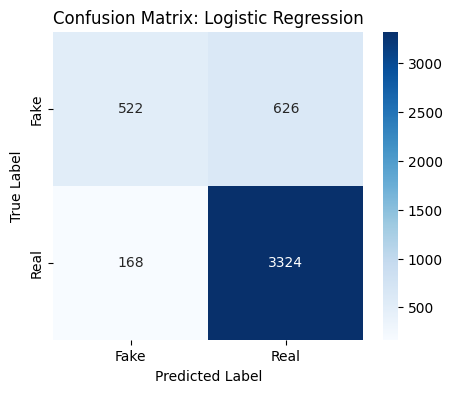

In [71]:
# Logistic Regression
plot_confusion("Logistic Regression", y_test, lr_preds)

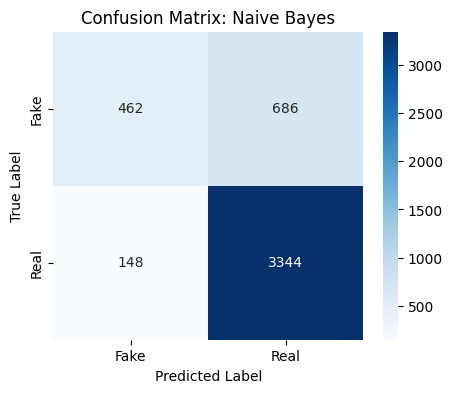

In [72]:
# Naive Bayes
plot_confusion("Naive Bayes", y_test, nb_preds)

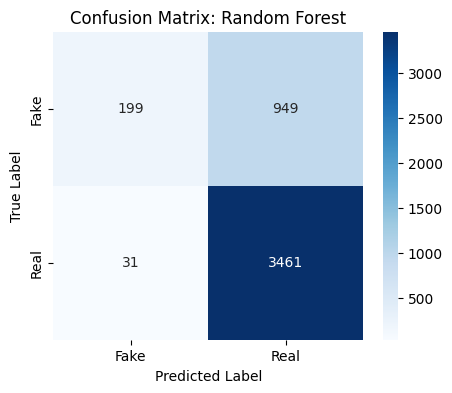

In [73]:
# Random Forest
plot_confusion("Random Forest", y_test, rf_preds)

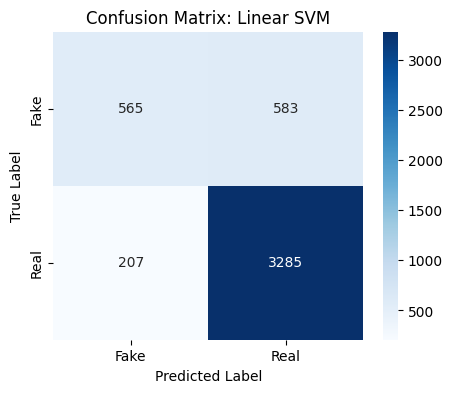

In [75]:
# Linear SVM
plot_confusion("Linear SVM", y_test, svm_preds)

In [80]:
# Observation:

# Random Forest has high precision but very low recall.It predicts 'Fake' only when it's very confident, missing many actual fake cases.
# LinearSVM offers a better balance between precision and recall for Fake news.
# Naive Bayes performs poorly on recall for Fake news.

In [81]:
# Conclusion: 
# If detecting fake news is the priority, LinearSVM is slightly better due to better recall and balanced F1 score. 
# Random Forest is not reliable here.

In [83]:
''' All models perform very well on Real news detection.
Random Forest and Naive Bayes have highest recall, meaning they rarely miss a real news article.
Logistic Regression has the best overall F1 score here. '''


' All models perform very well on Real news detection.\nRandom Forest and Naive Bayes have highest recall, meaning they rarely miss a real news article.\nLogistic Regression has the best overall F1 score here. '